<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Telecom_X_PrevendoChurn/notebooks/03_Reavaliacao_Modelos_SMOTE_Threshold_Interpretacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [43]:
# 1. Caminho para o arquivo gerado no notebook 02
caminho_arquivo = 'outputs_modelo_02/resultados_modelo_smote.csv'

# 2. Verificar se o arquivo existe
if not os.path.exists(caminho_arquivo):
    raise FileNotFoundError(f"Arquivo não encontrado em: {caminho_arquivo}")

# 3. Carregar o arquivo CSV com os resultados
df_resultados = pd.read_csv(caminho_arquivo)

# 4. Separar as variáveis
y_test = df_resultados['y_test']
y_pred = df_resultados['y_pred']
y_proba = df_resultados['y_proba']

# 5. Visualização inicial
print("✅ Dados de predição carregados com sucesso!")
print(df_resultados.head())

✅ Dados de predição carregados com sucesso!
   y_test  y_pred   y_proba
0       0       0  0.081994
1       0       1  0.526713
2       0       0  0.103819
3       0       0  0.018368
4       0       0  0.303145


In [44]:
X_resampled_scaled = joblib.load("models/X_resampled_scaled.pkl")
y_resampled = joblib.load("models/y_resampled.pkl")

In [45]:
# Importar os dados
X_test = pd.read_csv("export/X_test.csv")
y_test = pd.read_csv("export/y_test.csv")["y_test"]
y_pred_smote = pd.read_csv("export/y_pred_smote.csv")["y_pred_smote"]
y_proba_smote = pd.read_csv("export/y_proba_smote.csv")["y_proba_smote"]

# Importar o modelo (opcional, para usar em novos testes)
modelo_smote = joblib.load("export/modelo_smote.pkl")

print("✅ Dados e modelo importados com sucesso.")

✅ Dados e modelo importados com sucesso.


In [46]:
# Verificar tipo e dimensões
print("X_resampled_scaled:")
print(f"Tipo: {type(X_resampled_scaled)}")
print(f"Shape: {X_resampled_scaled.shape}\n")

print("y_resampled:")
print(f"Tipo: {type(y_resampled)}")
print(f"Shape: {y_resampled.shape}\n")
print(f"Distribuição de classes:\n{pd.Series(y_resampled).value_counts()}")

X_resampled_scaled:
Tipo: <class 'numpy.ndarray'>
Shape: (7228, 31)

y_resampled:
Tipo: <class 'pandas.core.series.Series'>
Shape: (7228,)

Distribuição de classes:
Churn
1    3614
0    3614
Name: count, dtype: int64


In [47]:
pd.DataFrame(X_resampled_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.007577,-0.477614,1.128763,1.676834,-0.437670,0.329786,0.732610,0.861912,-0.233710,0.861912,...,-0.597379,-0.449068,1.165105,-0.449068,1.148108,-0.459484,-0.464775,-0.485993,1.088580,-0.535544
1,-0.996816,-0.477614,1.128763,-0.599264,0.889027,0.329786,0.732610,-1.656870,-0.503896,-1.656870,...,-0.597379,2.226832,-0.858292,2.226832,-0.870998,2.176352,-0.464775,-0.485993,-0.918628,-0.535544
2,-0.996816,-0.477614,-0.891419,-0.599264,-0.852263,0.329786,-1.373095,-1.646447,-0.856460,-1.646447,...,-0.597379,2.226832,-0.858292,2.226832,-0.870998,-0.459484,-0.464775,-0.485993,-0.918628,1.867258
3,1.007577,2.095870,-0.891419,-0.599264,1.096324,0.329786,0.732610,0.775058,1.325650,0.775058,...,-0.597379,-0.449068,-0.858292,-0.449068,1.148108,-0.459484,-0.464775,-0.485993,1.088580,-0.535544
4,1.007577,-0.477614,-0.891419,-0.599264,1.759673,0.329786,0.732610,1.259706,2.383730,1.259706,...,1.673980,-0.449068,1.165105,-0.449068,1.148108,-0.459484,2.151577,2.057641,-0.918628,-0.535544


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinamento com dados balanceados e escalados
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled_scaled, y_resampled)

RandomForestClassifier(random_state=42)

In [49]:
# Previsão no conjunto balanceado (só pra ver como está)
y_pred_rf = rf_model.predict(X_resampled_scaled)

In [50]:
# Avaliação
print("Relatório de Classificação - Random Forest (dados balanceados):")
print(classification_report(y_resampled, y_pred_rf))
print("Matriz de Confusão:")
print(confusion_matrix(y_resampled, y_pred_rf))

Relatório de Classificação - Random Forest (dados balanceados):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      3614

    accuracy                           1.00      7228
   macro avg       1.00      1.00      1.00      7228
weighted avg       1.00      1.00      1.00      7228

Matriz de Confusão:
[[3609    5]
 [   2 3612]]


In [51]:
from sklearn.model_selection import train_test_split

# Separando treino e teste no conjunto balanceado
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

In [52]:
# Treinando novamente o modelo com dados de treino
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

In [54]:
# Avaliando
from sklearn.metrics import classification_report, confusion_matrix

print("Relatório de Classificação - Teste com SMOTE + Escalonamento:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Relatório de Classificação - Teste com SMOTE + Escalonamento:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       723
           1       0.83      0.87      0.85       723

    accuracy                           0.84      1446
   macro avg       0.84      0.84      0.84      1446
weighted avg       0.84      0.84      0.84      1446

Matriz de Confusão:
[[590 133]
 [ 95 628]]


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Carregar os dados com joblib
X_resampled_scaled = joblib.load('models/X_resampled_scaled.pkl')
y_resampled = joblib.load('models/y_resampled.pkl')
X_test_scaled = joblib.load('models/X_test_scaled.pkl')

In [56]:
# Treinar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled_scaled, y_resampled)

DecisionTreeClassifier(random_state=42)

In [57]:
# Previsão nos dados de teste
y_pred_dt = dt_model.predict(X_test)

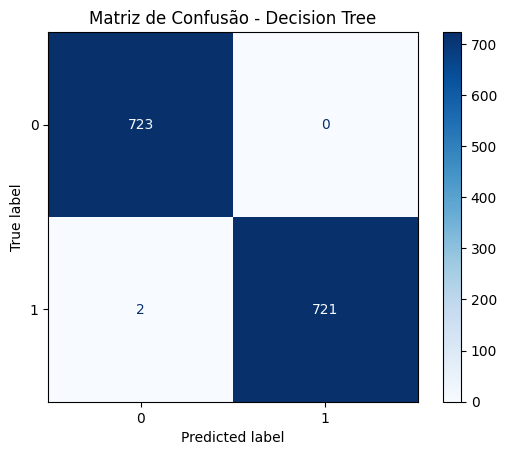

In [58]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Decision Tree")
plt.grid(False)
plt.show()

## 📤 Geração dos arquivos no Notebook 03:

📌 Classification Report do Modelo Final:

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Exportar classification report
report_final = classification_report(y_test, y_pred, output_dict=True)
df_report_final = pd.DataFrame(report_final).transpose()
df_report_final.to_csv("comparacao_modelos/modelo_final_classification_report.csv", index=True)


📌 Métricas principais:

In [62]:
# Exportar métricas principais
final_metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_proba)
}
df_metrics_final = pd.DataFrame([final_metrics])
df_metrics_final.to_csv("comparacao_modelos/modelo_final_metrics.csv", index=False)


ValueError: Found input variables with inconsistent numbers of samples: [1446, 2110]

📌 Dados da curva ROC:

In [ ]:
# Exportar dados da curva ROC
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, y_proba)
roc_df_final = pd.DataFrame({
    'fpr': fpr_final,
    'tpr': tpr_final,
    'threshold': thresholds_final
})
roc_df_final.to_csv("comparacao_modelos/modelo_final_roc_data.csv", index=False)

print("✅ Arquivos de comparação do modelo final salvos com sucesso.")

✅ Arquivos de comparação do modelo final salvos com sucesso.
